<a href="https://colab.research.google.com/github/JS0206/Data_Analysys_Programming/blob/main/%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [41]:
!pip install matplotlib seaborn

In [42]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# 데이터 로드
weather = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_날씨데이터.csv")
airport_stat = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_공항데이터.csv")
delay_stat = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_지연데이터.csv")
cancel_stat = pd.read_csv("/content/drive/MyDrive/데이터분석프로젝트/2021년_결항데이터.csv")

weather.drop('관측지점별', axis = 1, inplace = True)
airport_stat.drop('공항별(1)', axis = 1, inplace = True)
delay_stat.drop('공항별(1)', axis = 1, inplace = True)
cancel_stat.drop('공항별(1)', axis = 1, inplace = True)

weather.set_index(keys='시점', inplace = True)
airport_stat.set_index(keys='시점', inplace = True)
delay_stat.set_index(keys='시점', inplace = True)
cancel_stat.set_index(keys='시점', inplace = True)

airport_stat.drop(['시점'], axis = 0, inplace = True)
delay_stat.drop(['시점'], axis = 0 , inplace = True)
cancel_stat.drop(['시점'], axis = 0 , inplace = True)

weather.index = weather.index.astype(str)
weather = weather.replace('-',0)
weather['최심적설 (cm)'] = weather['최심적설 (cm)'].astype(float)

airport_stat[['운항 (편)', '여객 (명)']] = airport_stat[['운항 (편)', '여객 (명)']].astype(int)

delay_stat['지연'] = delay_stat['지연'].astype(float)
delay_stat['운항'] = delay_stat['운항'].astype(float)

delay_stat['지연율'] = delay_stat['지연'] / delay_stat['운항'] * 100

cancel_stat['결항'] = cancel_stat['결항'].astype(float)
cancel_stat['운항'] = cancel_stat['운항'].astype(float)

cancel_stat['결항률'] = cancel_stat['결항'] / cancel_stat['운항'] * 100

print(weather.head())
print(airport_stat.head())
print(delay_stat.head())
print(cancel_stat.head())



         평균기온 (℃)  합계강수량 (mm)  최심적설 (cm)  평균풍속 (m/s)  평균전운량 (할)
시점                                                             
2021.01       6.8       116.6        9.2         3.9        6.9
2021.02       9.4        52.8        1.8         3.9        5.7
2021.03      12.5        81.1        0.0         3.1        5.9
2021.04      15.4        58.8        0.0         3.2        5.5
2021.05      19.0       100.7        0.0         3.0        5.8
         운항 (편)   여객 (명)
시점                      
2021.01    3407   527721
2021.02    5531   881023
2021.03    6476   989039
2021.04    7310  1183138
2021.05    7527  1208731
              운항     지연       지연율
시점                               
2021.01   6355.0   70.0  1.101495
2021.02  10230.0  161.0  1.573803
2021.03  12069.0   55.0  0.455713
2021.04  13789.0  100.0  0.725216
2021.05  14093.0   33.0  0.234159
              운항     결항       결항률
시점                               
2021.01   6355.0  355.0  5.586153
2021.02  10230.0   56.0  0.547410
202

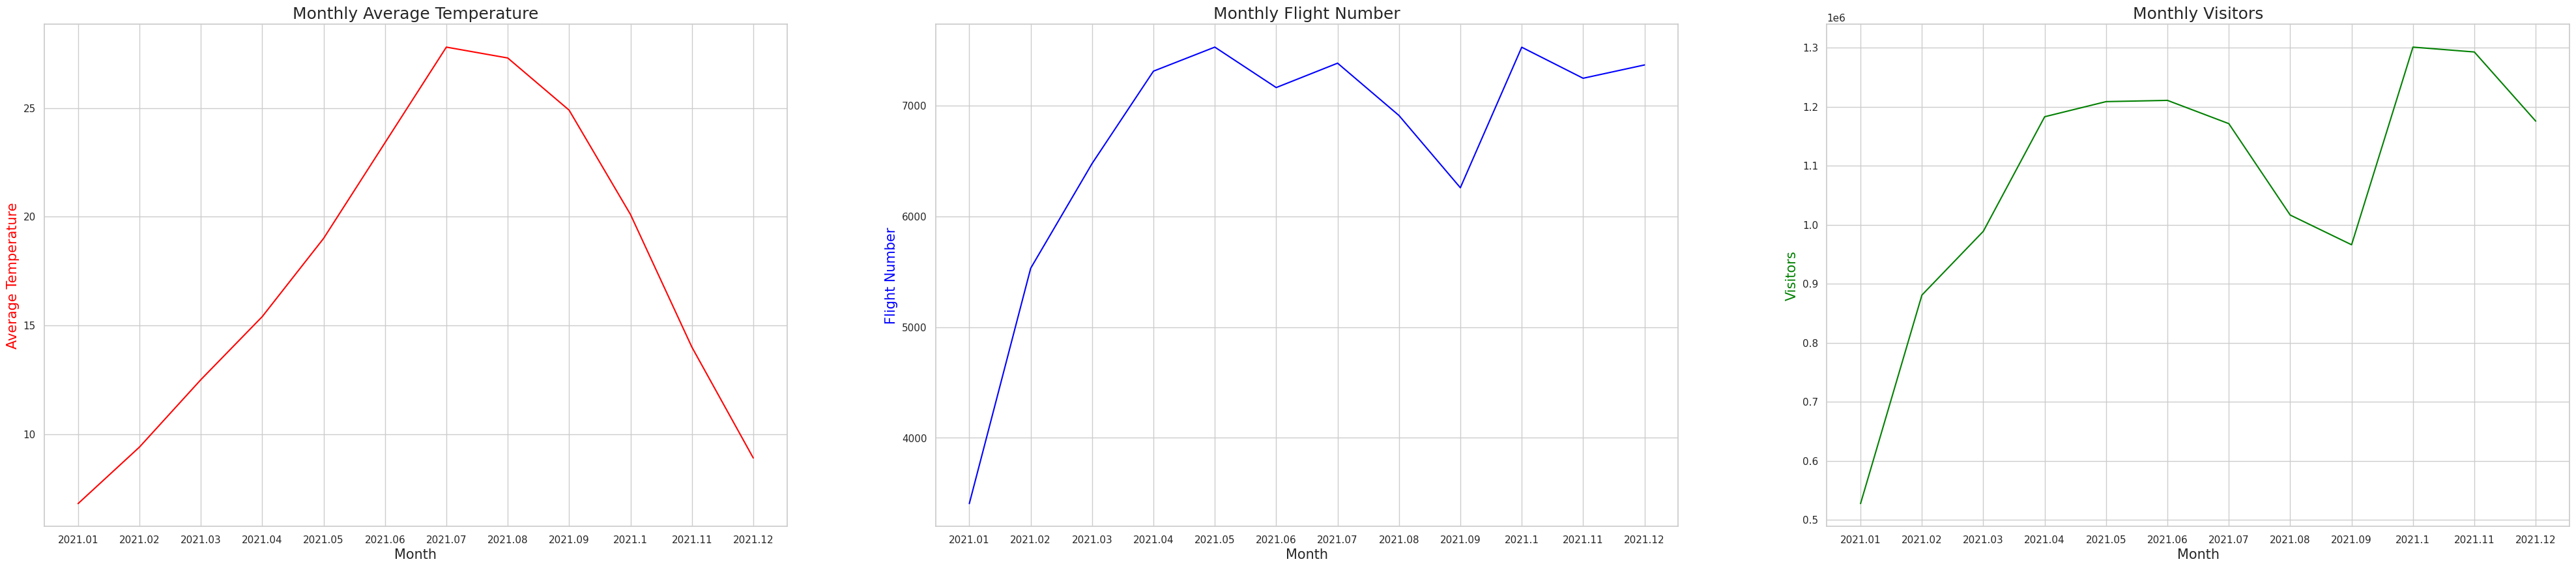

In [43]:

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 그래프 그리기
fig, ax1 = plt.subplots(1,3,figsize=(50, 10))

# 첫 번째 축 (운항 및 여객 그래프)

ax1[0].set_xlabel('Month', fontsize=15)
ax1[0].set_ylabel('Average Temperature', color= 'red', fontsize=15)
ax1[0].plot(weather.index, weather['평균기온 (℃)'], color= 'red')

ax1[1].set_xlabel('Month', fontsize=15)
ax1[1].set_ylabel('Flight Number', color= 'blue', fontsize=15)
ax1[1].plot(weather.index, airport_stat['운항 (편)'], color= 'blue')

ax1[2].set_xlabel('Month', fontsize=15)
ax1[2].set_ylabel('Visitors', color= 'green', fontsize=15)
ax1[2].plot(weather.index, airport_stat['여객 (명)'], color= 'green')

ax1[0].set_title("Monthly Average Temperature",fontsize = 18)
ax1[1].set_title("Monthly Flight Number",fontsize = 18)
ax1[2].set_title("Monthly Visitors",fontsize = 18)

# 그래프 출력
plt.show()


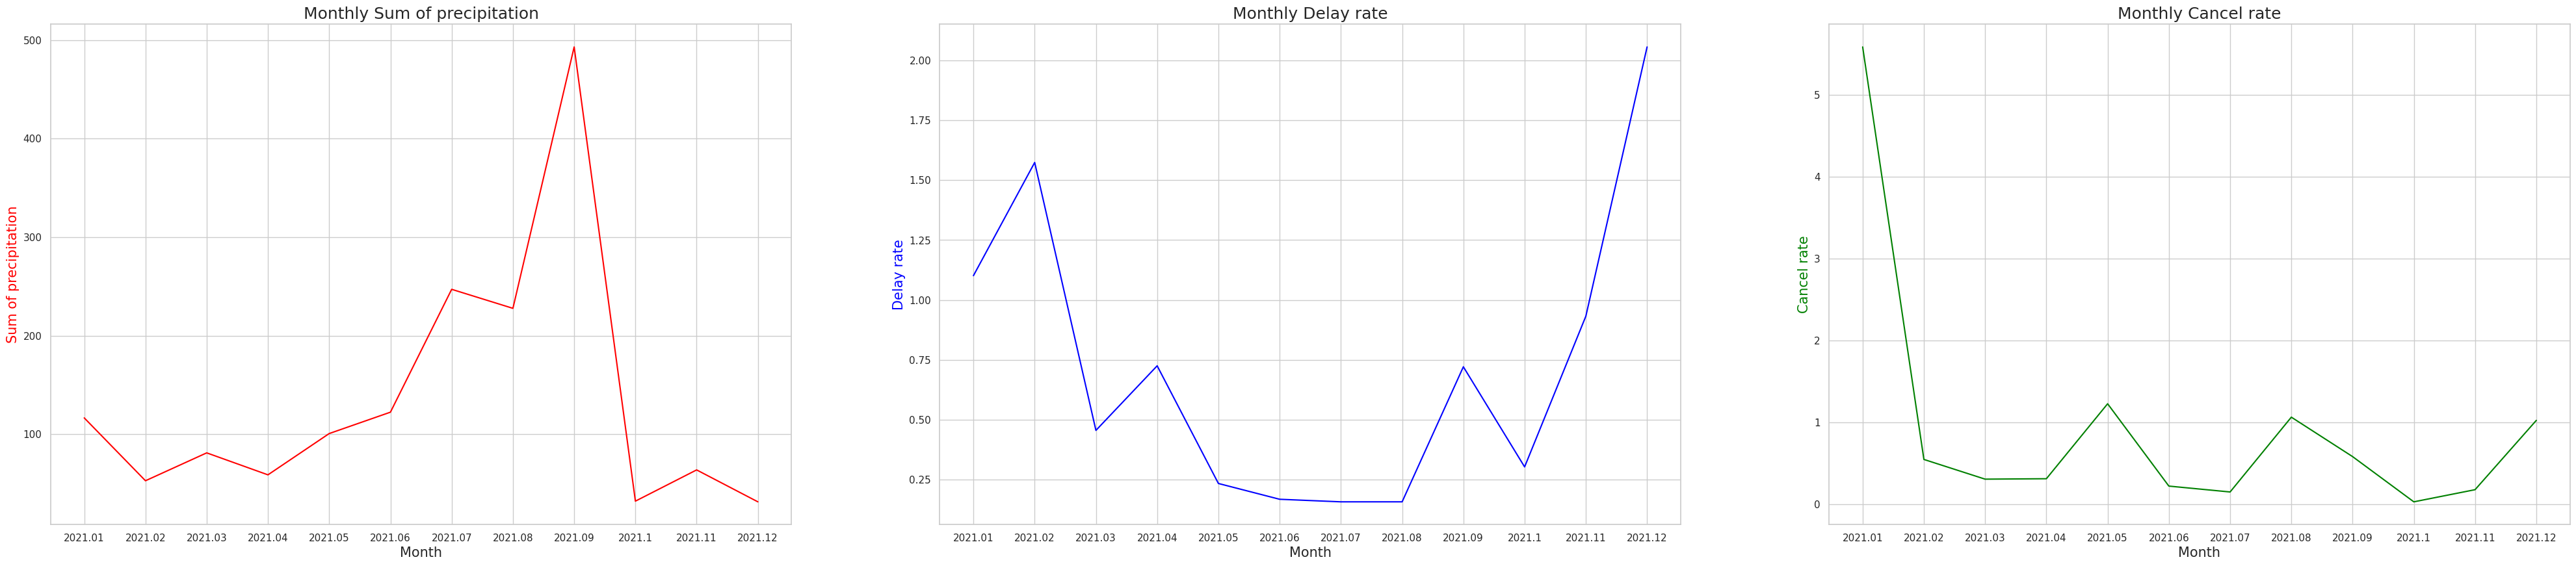

In [44]:
sns.set(style="whitegrid")

# 그래프 그리기
fig, ax2 = plt.subplots(1,3,figsize=(50, 10))

ax2[0].set_xlabel('Month', fontsize=15)
ax2[0].set_ylabel('Sum of precipitation', color= 'red', fontsize=15)
ax2[0].plot(weather.index, weather['합계강수량 (mm)'], color= 'red')

ax2[1].set_xlabel('Month', fontsize=15)
ax2[1].set_ylabel('Delay rate', color= 'blue', fontsize=15)
ax2[1].plot(weather.index, delay_stat['지연율'], color= 'blue')

ax2[2].set_xlabel('Month', fontsize=15)
ax2[2].set_ylabel('Cancel rate', color= 'green', fontsize=15)
ax2[2].plot(weather.index, cancel_stat['결항률'], color= 'green')

ax2[0].set_title("Monthly Sum of precipitation",fontsize = 18)
ax2[1].set_title("Monthly Delay rate",fontsize = 18)
ax2[2].set_title("Monthly Cancel rate",fontsize = 18)

# 그래프 출력
plt.show()

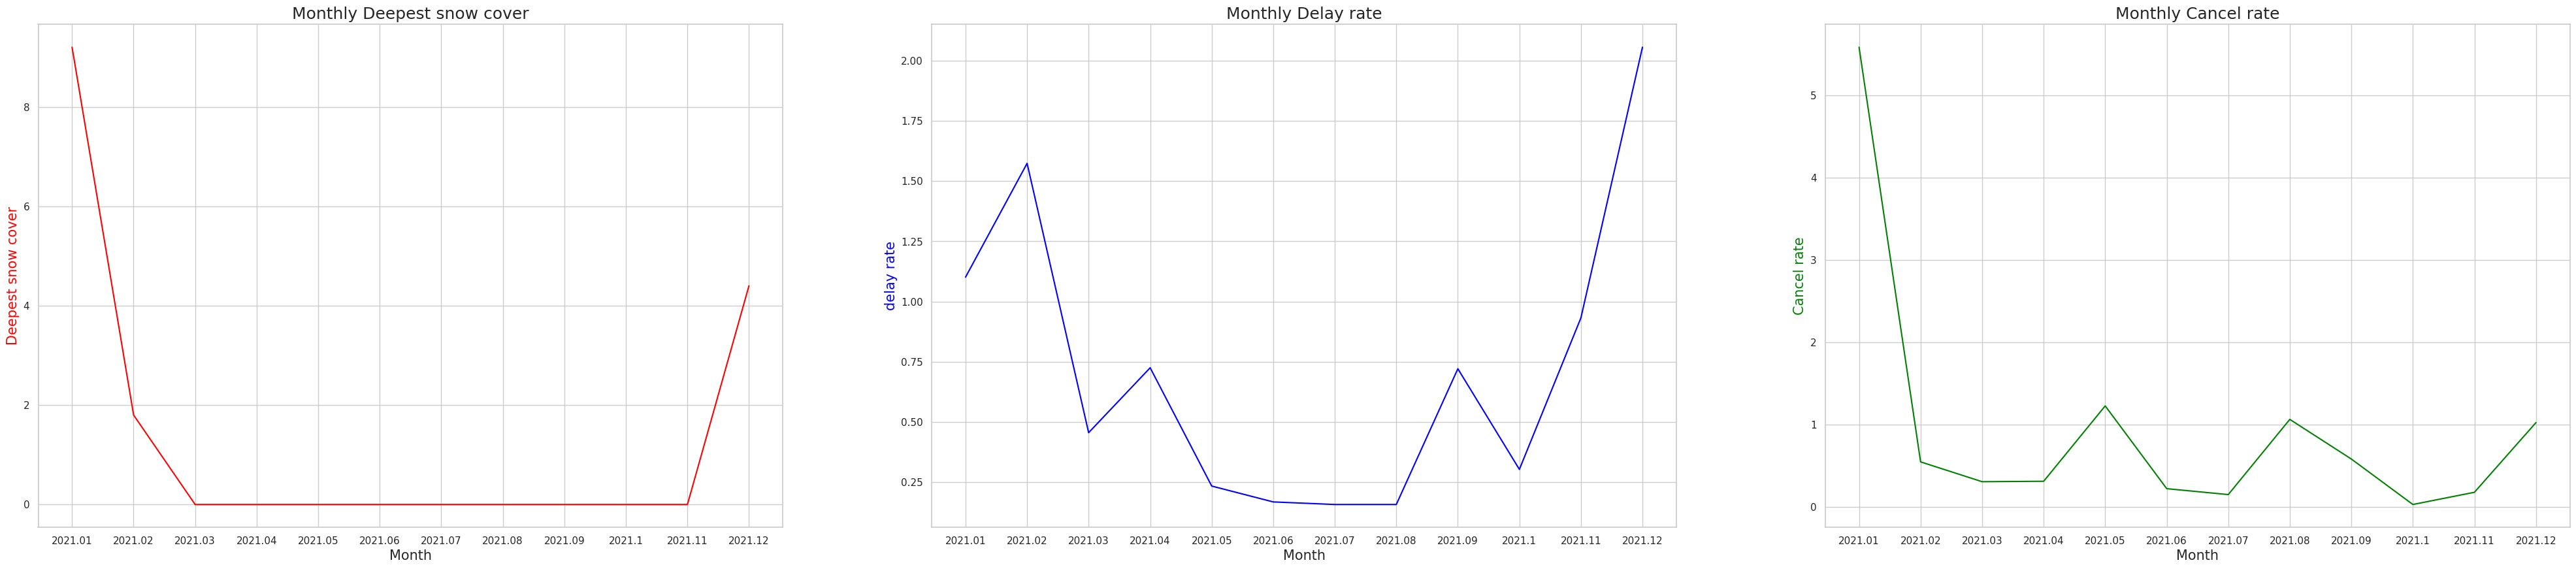

In [45]:
sns.set(style="whitegrid")

# 그래프 그리기
fig, ax3 = plt.subplots(1,3,figsize=(50, 10))

# 첫 번째 축 (운항 및 여객 그래프)

ax3[0].set_xlabel('Month', fontsize=15)
ax3[0].set_ylabel('Deepest snow cover', color= 'red', fontsize=15)
ax3[0].plot(weather.index, weather['최심적설 (cm)'], color= 'red')

ax3[1].set_xlabel('Month', fontsize=15)
ax3[1].set_ylabel('delay rate', color= 'blue', fontsize=15)
ax3[1].plot(weather.index, delay_stat['지연율'], color= 'blue')

ax3[2].set_xlabel('Month', fontsize=15)
ax3[2].set_ylabel('Cancel rate', color= 'green', fontsize=15)
ax3[2].plot(weather.index, cancel_stat['결항률'], color= 'green')

ax3[0].set_title("Monthly Deepest snow cover",fontsize = 18)
ax3[1].set_title("Monthly Delay rate",fontsize = 18)
ax3[2].set_title("Monthly Cancel rate",fontsize = 18)

# 그래프 출력
plt.show()

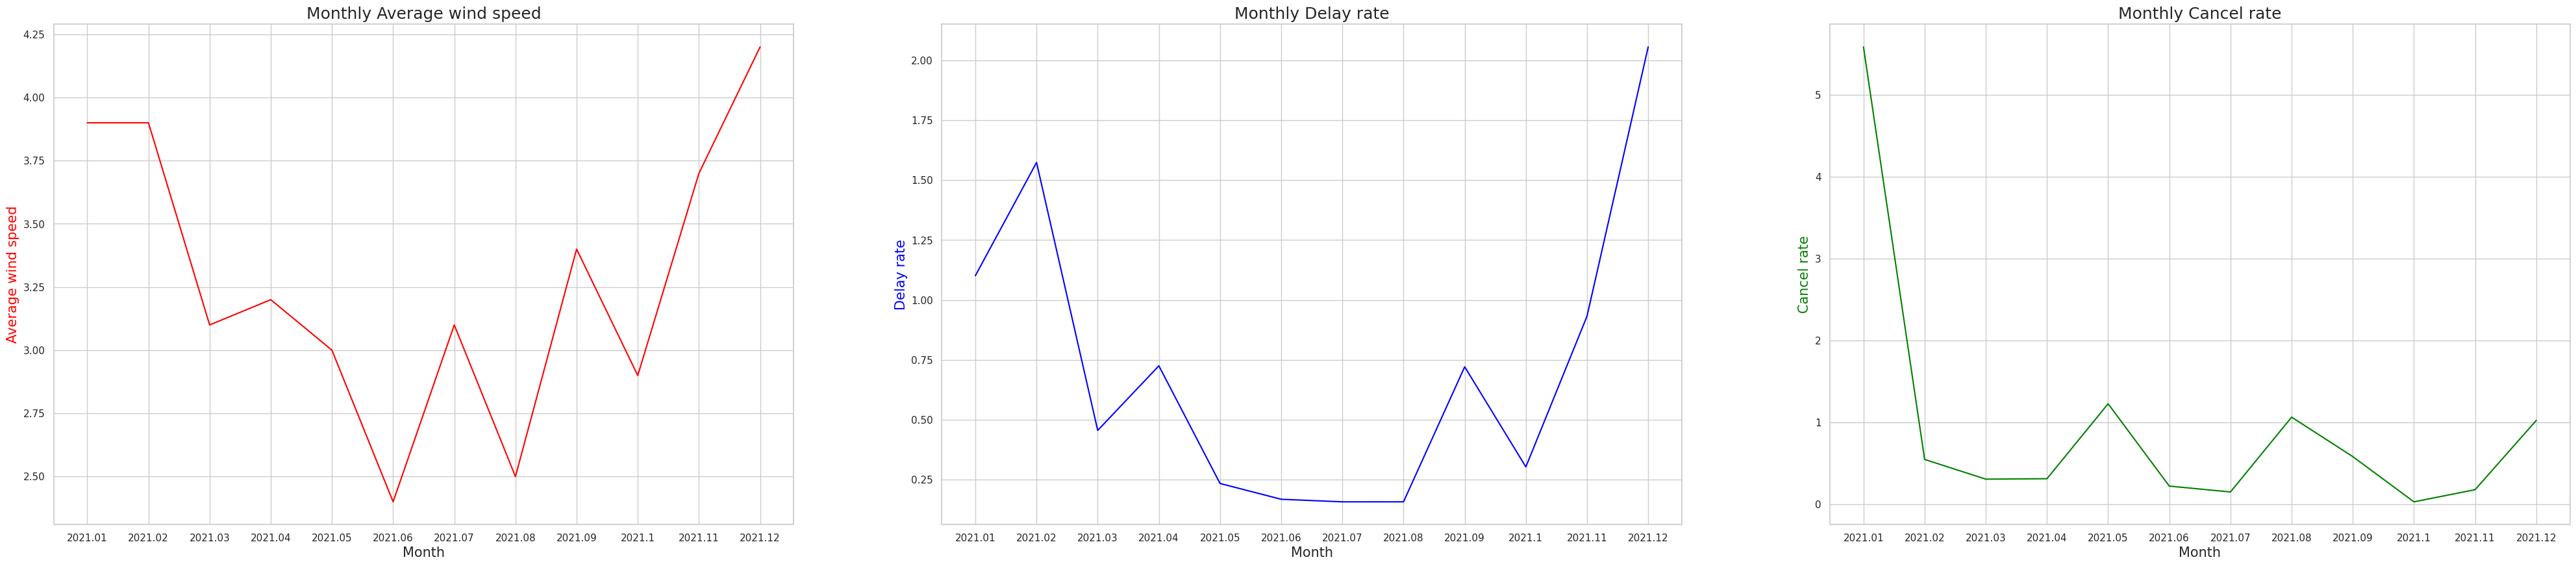

In [46]:
sns.set(style="whitegrid")

# 그래프 그리기
fig, ax4 = plt.subplots(1,3,figsize=(50, 10))

# 첫 번째 축 (운항 및 여객 그래프)

ax4[0].set_xlabel('Month', fontsize=15)
ax4[0].set_ylabel('Average wind speed', color= 'red', fontsize=15)
ax4[0].plot(weather.index, weather['평균풍속 (m/s)'], color= 'red')

ax4[1].set_xlabel('Month', fontsize=15)
ax4[1].set_ylabel('Delay rate', color= 'blue', fontsize=15)
ax4[1].plot(weather.index, delay_stat['지연율'], color= 'blue')

ax4[2].set_xlabel('Month', fontsize=15)
ax4[2].set_ylabel('Cancel rate', color= 'green', fontsize=15)
ax4[2].plot(weather.index, cancel_stat['결항률'], color= 'green')

ax4[0].set_title("Monthly Average wind speed",fontsize = 18)
ax4[1].set_title("Monthly Delay rate",fontsize = 18)
ax4[2].set_title("Monthly Cancel rate",fontsize = 18)
# 그래프 출력
plt.show()

데이터 분석결과 항공편의 이동량, 즉 관광객수는 연초에 가장 적다가 연말이 될수록 많아지며, 특히 여름 과 겨울 휴가시즌에 많은 것을 볼수 있다.
아주더운 7월과 추운 12월에도 불구하고 관광객수가 많은 것을 보아 우리나라 국민들은 기온보다는 휴가시즌에 맞춰서 여행을 가는 경우가 많은것으로 보인다.

지연율의 경우는 풍속에 가장많은 영향을 받는 것으로 보이면 강한바람이 불 경우 지연했다가 다시 운행하는 경우가 많았다.

결항률의 경우는 폭설이 올 경우에 가장 많이 결항되는 것으로 보아 눈이 운행에 큰 지장을 주는것을 알 수 있다.

강수량은 9월달에 제일 많은 반면, 지연율과 결항률에 별 영향을 주지 않는것으로 보아 호우는 운행에 영향을 별로 주지 않는 것으로 보인다.

결과적으로 효율적인 제주도 여행을 위해서 휴가시즌보다는 적당한 기온때 가는것이 쾌적하며 결항과 지연을 피하기 위해서는 호우주의보 보다는 강풍주의보와 폭설예보를 꼼꼼히 확인하는것이 중요하다고 판단된다.